In [1]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
import spacy
nlp = spacy.load('en_core_web_lg')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import sys
sys.path.append('/Users/sw/Documents/Github/GoFundMe_scraper')
from GoFundMe_scraper import ShowMore_clicker, MyWebScraper, profile_reader

# Web Scraping

In [3]:
search_links = \
['https://www.gofundme.com/discover/cancer-fundraiser',
'https://www.gofundme.com/discover/surgery-fundraiser',
'https://www.gofundme.com/discover/competition-fundraiser',
'https://www.gofundme.com/discover/creative-fundraiser',
'https://www.gofundme.com/discover/education-fundraiser',
'https://www.gofundme.com/discover/sports-fundraiser']

In [ ]:
start_time = time.time()
for i in range(len(search_links)):
    search_res = MyWebScraper(search_links[i])
    if search_res.num_supply == 1000: 
        print('=================================================================')
        print("--- %s have found ---" % (search_res.num_supply))
        try:
            scraping_res = list(map(profile_reader, search_res.fundraisers_links))
            scraping_res = pd.DataFrame(scraping_res, columns = [['title','created_date','tag','location','text']])
            scraping_res['link'] = search_res.fundraisers_links
            scraping_res.to_csv("20210122/" + search_res.search_term + ".csv",index=False,sep=',')
            print("--- SCRAPING SUCCEEDED ---")
        except:
            pass  
    
print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
mypath = '20210122'
l = []
for (dirpath, dirnames, filenames) in os.walk(mypath):
    l.extend(os.path.join(dirpath, filename) for filename in filenames)
    
l = [x for x in l if '.csv' in x]
l

['20210122/education.csv',
 '20210122/surgery.csv',
 '20210122/cancer.csv',
 '20210122/creative.csv',
 '20210122/competition.csv',
 '20210122/sports.csv']

# Frequency Distribution of Lexicon

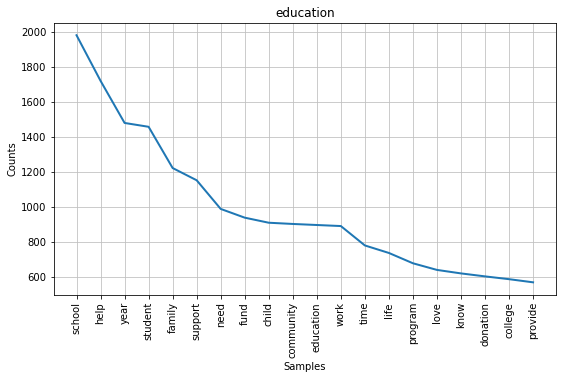

<AxesSubplot:title={'center':'education'}, xlabel='Samples', ylabel='Counts'>

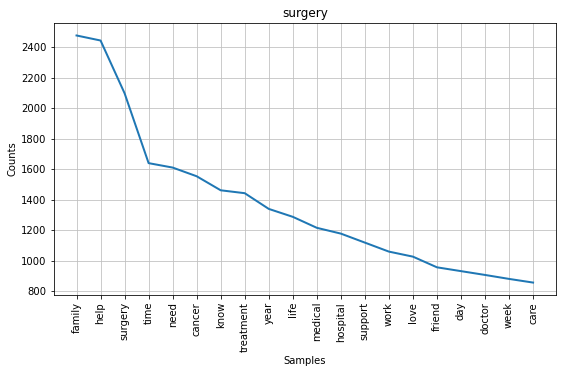

<AxesSubplot:title={'center':'surgery'}, xlabel='Samples', ylabel='Counts'>

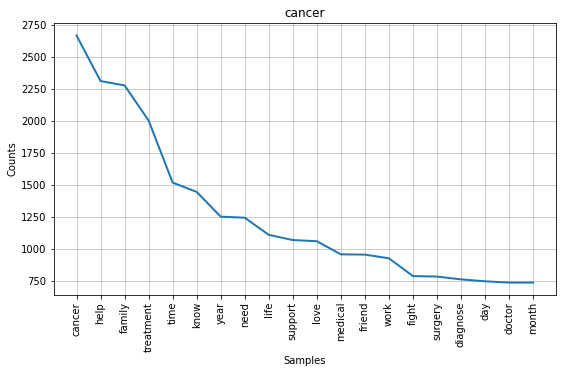

<AxesSubplot:title={'center':'cancer'}, xlabel='Samples', ylabel='Counts'>

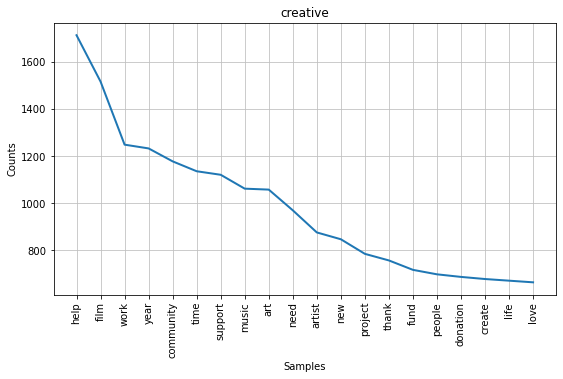

<AxesSubplot:title={'center':'creative'}, xlabel='Samples', ylabel='Counts'>

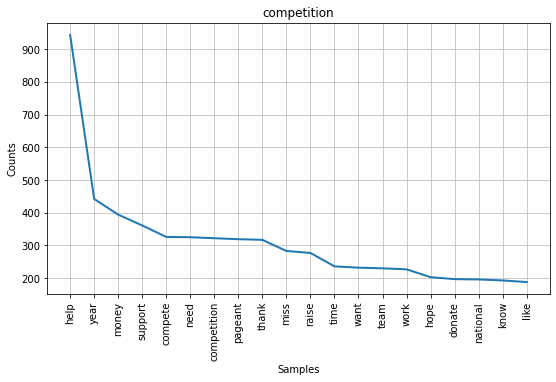

<AxesSubplot:title={'center':'competition'}, xlabel='Samples', ylabel='Counts'>

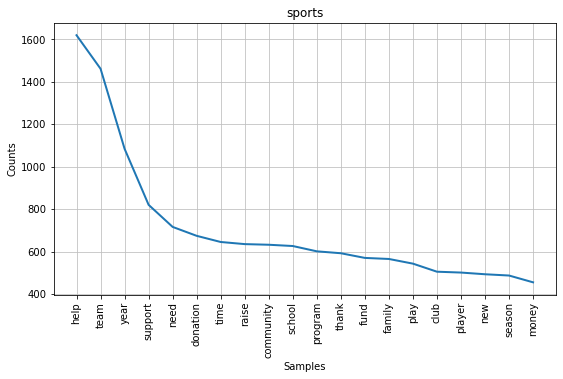

<AxesSubplot:title={'center':'sports'}, xlabel='Samples', ylabel='Counts'>

In [17]:
for index in range(len(l)):
    d = pd.read_csv(l[index])

    agg_lexicon = []
    for i in d.text:
        if str(i) == 'nan':
            continue
        doc = nlp(i)
        lexicon = [token.lemma_.strip().lower() for token in doc \
                   if any([token.is_stop, token.is_punct, token.is_digit,token.is_currency]) != True]
        agg_lexicon = agg_lexicon + lexicon

    fig = plt.figure(figsize=(9, 5))
    word_counts = nltk.FreqDist(agg_lexicon)
    word_counts.plot(20,
                     cumulative=False,
                     title=l[index].split('.csv')[0].split('/')[1])
    plt.show()
    #fig.savefig(l[index].replace('.csv', '.png'), bbox_inches="tight", dpi=1000)